## Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

Load the dataset:

In [2]:
wine_data = pd.read_csv('datasets/wine-clustering.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
rows, columns = wine_data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 178
Number of columns: 13


Clean and the data by dropping rows:

In [4]:
wine_data = wine_data.dropna()
wine_data = wine_data.drop_duplicates()
rows, columns = wine_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 178
Number of columns: 13


Define and normalize input features:

In [5]:
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 
           'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 
           'Hue', 'OD280', 'Proline']
X = wine_data[features].copy()


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Evaluate K Means

Optimal k for Silhouette Score: 2
Optimal k for Calinski-Harabasz Index: 20
Optimal k for Davies-Bouldin Score: 7


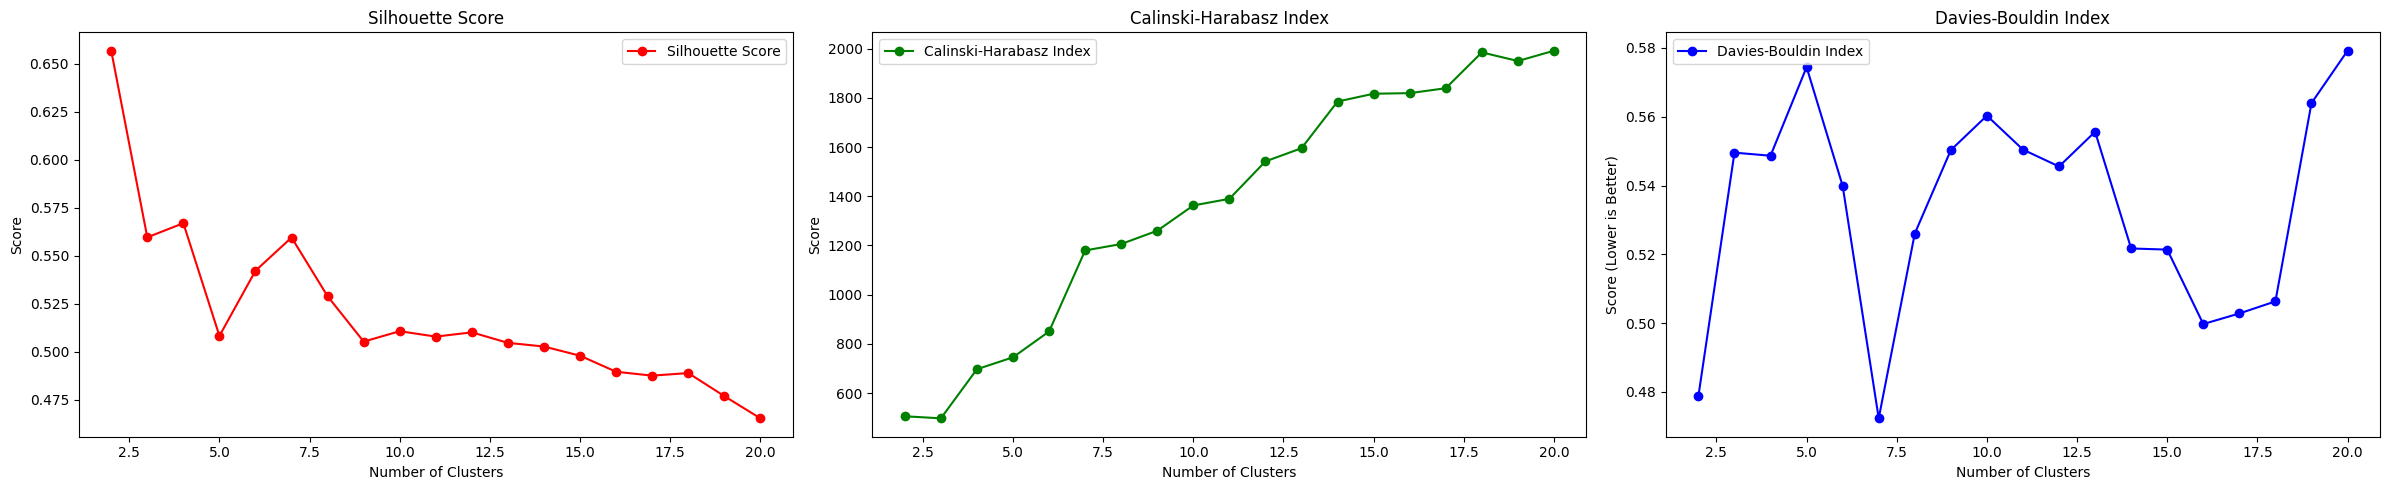

In [6]:
#Define the range for the number of clusters
cluster_range = range(2, 21)

#Initialize lists to store metric values
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

#Compute metrics for each number of clusters
for k in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    # Calculate metrics
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

#Find the optimal k value for each method
optimal_k_silhouette = cluster_range[silhouette_scores.index(max(silhouette_scores))]
optimal_k_calinski = cluster_range[calinski_scores.index(max(calinski_scores))]
optimal_k_davies_bouldin = cluster_range[davies_bouldin_scores.index(min(davies_bouldin_scores))]

print(f"Optimal k for Silhouette Score: {optimal_k_silhouette}")
print(f"Optimal k for Calinski-Harabasz Index: {optimal_k_calinski}")
print(f"Optimal k for Davies-Bouldin Score: {optimal_k_davies_bouldin}")

#Visualization
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

# Silhouette Score
axes[0].plot(cluster_range, silhouette_scores, 'ro-', label='Silhouette Score')
axes[0].set_title("Silhouette Score")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Score")
axes[0].legend()

# Calinski-Harabasz Index
axes[1].plot(cluster_range, calinski_scores, 'go-', label='Calinski-Harabasz Index')
axes[1].set_title("Calinski-Harabasz Index")
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Score")
axes[1].legend()

# Davies-Bouldin Index
axes[2].plot(cluster_range, davies_bouldin_scores, 'bo-', label='Davies-Bouldin Index')
axes[2].set_title("Davies-Bouldin Index")
axes[2].set_xlabel("Number of Clusters")
axes[2].set_ylabel("Score (Lower is Better)")
axes[2].legend()

plt.tight_layout()
plt.show()


Evaluate GMM

Optimal k for Silhouette Score (GMM): 2
Optimal k for Calinski-Harabasz Index (GMM): 20
Optimal k for Davies-Bouldin Score (GMM): 16


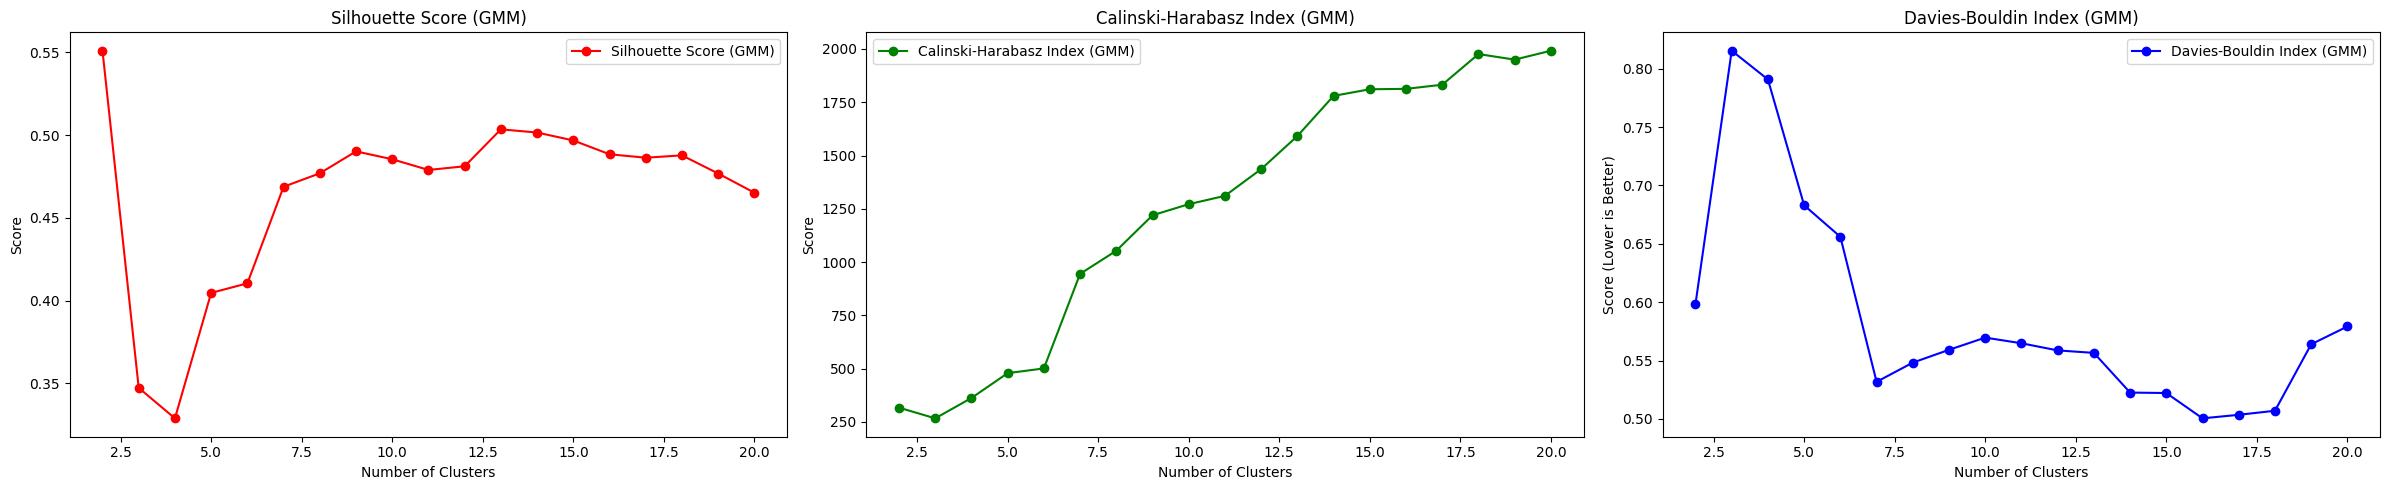

In [7]:
#Define the range for the number of clusters
cluster_range = range(2, 21)

#Initialize lists to store metric values
silhouette_scores_gmm = []
calinski_scores_gmm = []
davies_bouldin_scores_gmm = []

#Compute metrics for each number of clusters using GMM
for k in cluster_range:
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm_labels = gmm.fit_predict(X)

    # Calculate metrics
    silhouette_scores_gmm.append(silhouette_score(X, gmm_labels))
    calinski_scores_gmm.append(calinski_harabasz_score(X, gmm_labels))
    davies_bouldin_scores_gmm.append(davies_bouldin_score(X, gmm_labels))

#Find the optimal k value for each method
optimal_k_silhouette_gmm = cluster_range[silhouette_scores_gmm.index(max(silhouette_scores_gmm))]
optimal_k_calinski_gmm = cluster_range[calinski_scores_gmm.index(max(calinski_scores_gmm))]
optimal_k_davies_bouldin_gmm = cluster_range[davies_bouldin_scores_gmm.index(min(davies_bouldin_scores_gmm))]

print(f"Optimal k for Silhouette Score (GMM): {optimal_k_silhouette_gmm}")
print(f"Optimal k for Calinski-Harabasz Index (GMM): {optimal_k_calinski_gmm}")
print(f"Optimal k for Davies-Bouldin Score (GMM): {optimal_k_davies_bouldin_gmm}")

#Visualization
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

# Silhouette Score
axes[0].plot(cluster_range, silhouette_scores_gmm, 'ro-', label='Silhouette Score (GMM)')
axes[0].set_title("Silhouette Score (GMM)")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Score")
axes[0].legend()

# Calinski-Harabasz Index
axes[1].plot(cluster_range, calinski_scores_gmm, 'go-', label='Calinski-Harabasz Index (GMM)')
axes[1].set_title("Calinski-Harabasz Index (GMM)")
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Score")
axes[1].legend()

# Davies-Bouldin Index
axes[2].plot(cluster_range, davies_bouldin_scores_gmm, 'bo-', label='Davies-Bouldin Index (GMM)')
axes[2].set_title("Davies-Bouldin Index (GMM)")
axes[2].set_xlabel("Number of Clusters")
axes[2].set_ylabel("Score (Lower is Better)")
axes[2].legend()

plt.tight_layout()
plt.show()

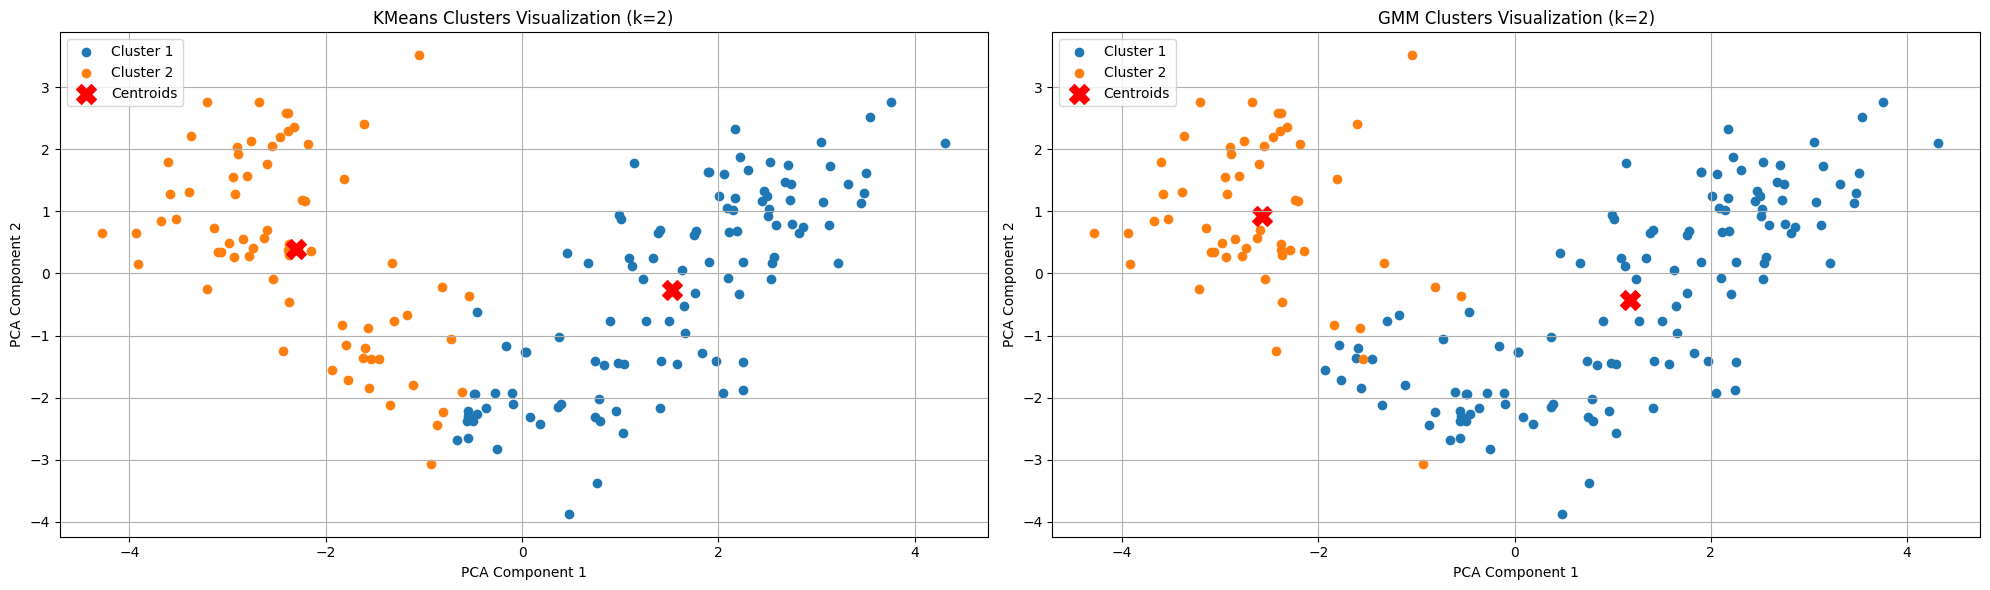

In [8]:
# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Fit GMM with the optimal number of clusters
gmm = GaussianMixture(n_components=optimal_k_silhouette_gmm, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot KMeans clusters
axes[0].set_title(f'KMeans Clusters Visualization (k={optimal_k_silhouette})')
for cluster in range(optimal_k_silhouette):
    cluster_points = X_pca[labels_kmeans == cluster]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster+1}")
# Plot KMeans centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].legend()
axes[0].grid()

# Plot GMM clusters
axes[1].set_title(f'GMM Clusters Visualization (k={optimal_k_silhouette_gmm})')
for cluster in range(optimal_k_silhouette_gmm):
    cluster_points = X_pca[labels_gmm == cluster]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster+1}")
# Plot GMM centroids (mean of Gaussian components)
centroids_pca = pca.transform(gmm.means_)
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


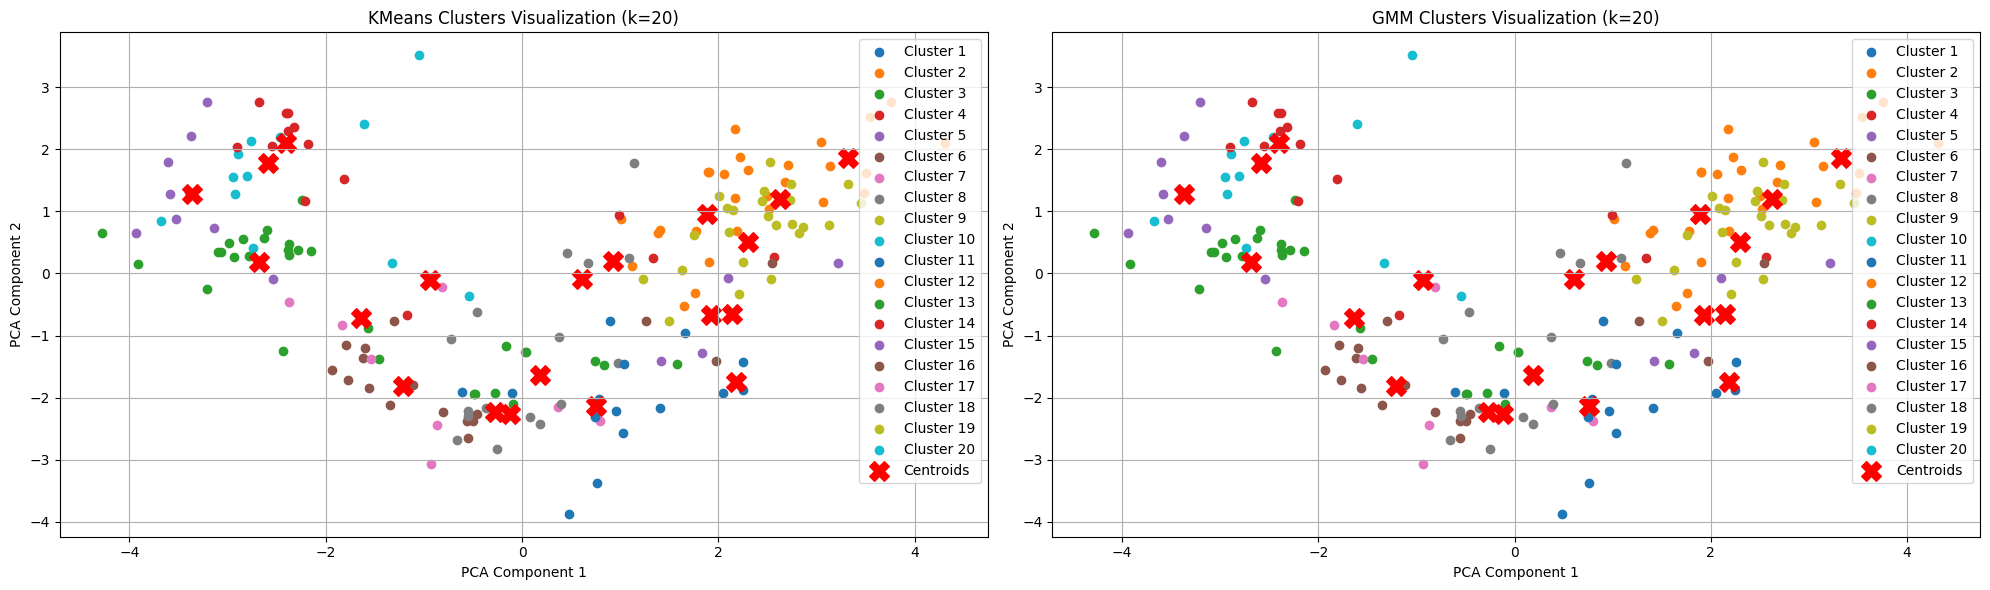

In [9]:
# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans with the optimal number of clusters based on Calinski-Harabasz Index
kmeans = KMeans(n_clusters=optimal_k_calinski, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Fit GMM with the optimal number of clusters based on Calinski-Harabasz Index
gmm = GaussianMixture(n_components=optimal_k_calinski_gmm, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot KMeans clusters
axes[0].set_title(f'KMeans Clusters Visualization (k={optimal_k_calinski})')
for cluster in range(optimal_k_calinski):
    cluster_points = X_pca[labels_kmeans == cluster]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster+1}")
# Plot KMeans centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].legend()
axes[0].grid()

# Plot GMM clusters
axes[1].set_title(f'GMM Clusters Visualization (k={optimal_k_calinski_gmm})')
for cluster in range(optimal_k_calinski_gmm):
    cluster_points = X_pca[labels_gmm == cluster]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster+1}")
# Plot GMM centroids (mean of Gaussian components)
centroids_pca = pca.transform(gmm.means_)
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


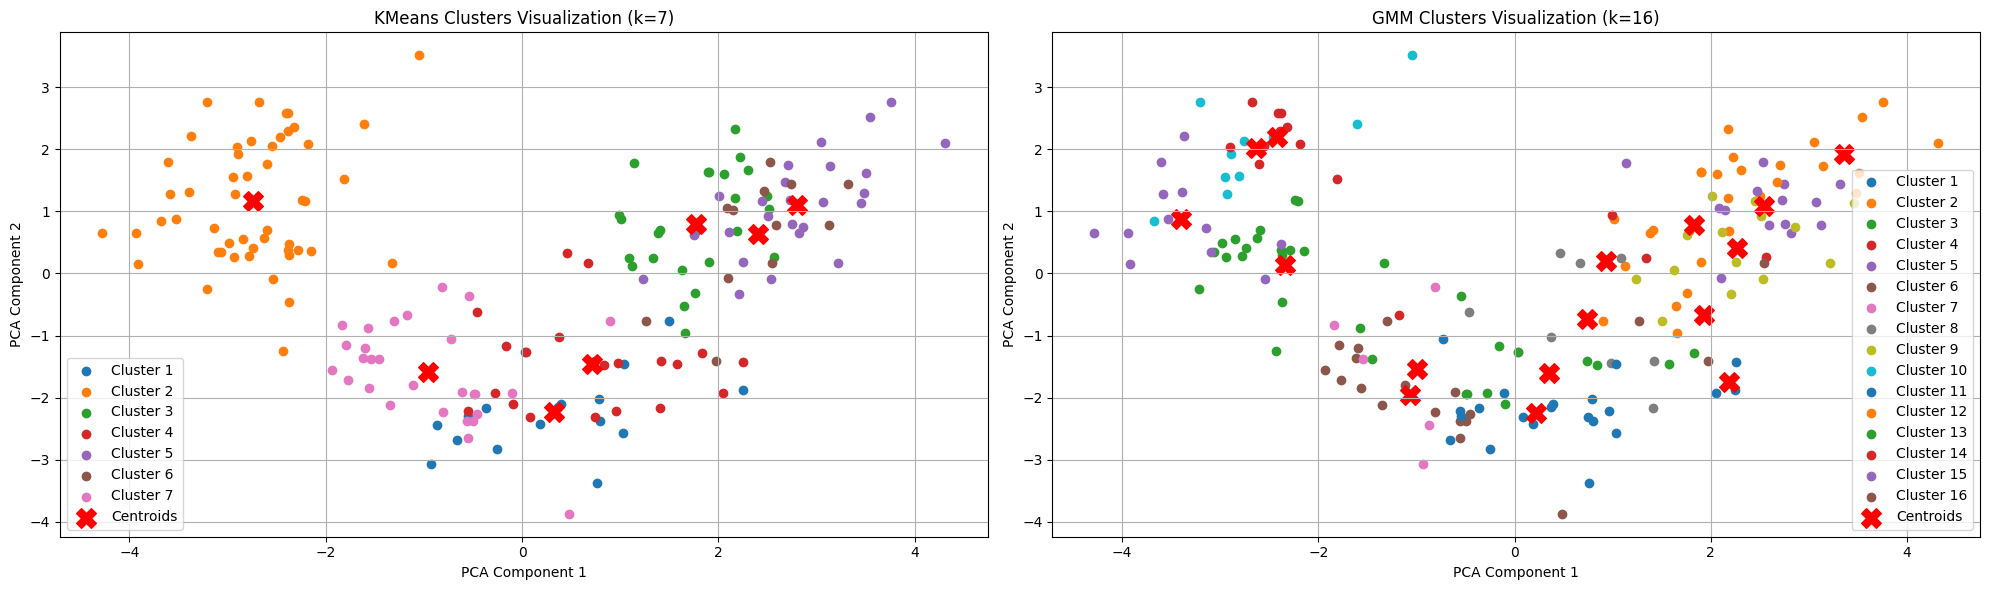

In [10]:
# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans with the optimal number of clusters based on Davies-Bouldin Score
kmeans = KMeans(n_clusters=optimal_k_davies_bouldin, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Fit GMM with the optimal number of clusters based on Davies-Bouldin Score
gmm = GaussianMixture(n_components=optimal_k_davies_bouldin_gmm, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot KMeans clusters
axes[0].set_title(f'KMeans Clusters Visualization (k={optimal_k_davies_bouldin})')
for cluster in range(optimal_k_davies_bouldin):
    cluster_points = X_pca[labels_kmeans == cluster]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster+1}")
# Plot KMeans centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].legend()
axes[0].grid()

# Plot GMM clusters
axes[1].set_title(f'GMM Clusters Visualization (k={optimal_k_davies_bouldin_gmm})')
for cluster in range(optimal_k_davies_bouldin_gmm):
    cluster_points = X_pca[labels_gmm == cluster]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster+1}")
# Plot GMM centroids (mean of Gaussian components)
centroids_pca = pca.transform(gmm.means_)
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()
